In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection

In [2]:
# from google.colab import files

# uploaded = files.upload()
df_f = pd.read_csv('dataset.csv')

In [3]:
df_f = pd.read_csv('dataset.csv')
df_f.dropna(axis=0, inplace=True)


df_f.loc[:,"BMI"] = (df_f.loc[:,"Weight (Kg)"]) / np.square(df_f.loc[:,"Height(Cm) "]/100); # Calculate BMI(Body Mass Index)
df_f.loc[:,"BMI"] = df_f.loc[:,"BMI"].round(2); # Round to two decimal places
df_f.loc[:,"FSH/LH"] = df_f.loc[:,"FSH(mIU/mL)"] / df_f.loc[:,"LH(mIU/mL)"];
df_f.loc[:,"FSH/LH"] = df_f.loc[:,"FSH/LH"].round(2);
df_f.loc[:,"Waist:Hip Ratio"] = df_f.loc[:,"Waist(inch)"] / df_f.loc[:,"Hip(inch)"]
df_f.loc[:,"Waist:Hip Ratio"] = df_f.loc[:,"Waist:Hip Ratio"].round(2)
# df[df["Cycle(R/I)"] == 5]
df_f["Cycle(R/I)"].replace({5: 4}, inplace=True)
df_f["Cycle(R/I)"].replace({2: 0, 4: 1}, inplace=True)
df_f["II    beta-HCG(mIU/mL)"].replace({"1.99.": 1.99}, inplace=True)

df_f["II    beta-HCG(mIU/mL)"] = df_f["II    beta-HCG(mIU/mL)"].astype(float)
df_f[df_f["AMH(ng/mL)"]== "a"].T
# df_f.drop(df_f["AMH(ng/mL)"]== "a", inplace=True)
df_f.drop(df_f.loc[df_f["AMH(ng/mL)"]== "a"].index, inplace=True);
df_f[df_f["AMH(ng/mL)"]== "a"]
df_f["AMH(ng/mL)"] = df_f["AMH(ng/mL)"].astype(float)
df_f["BP _Systolic (mmHg)"].replace({12: 120}, inplace=True)
df_f["BP _Diastolic (mmHg)"].replace({8: 80}, inplace=True)
df_f.to_csv('PCOS_clean_data_without_infertility.csv', index=False)

from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

df = pd.read_csv('PCOS_clean_data_without_infertility.csv')
df.head(12).T
#df.columns

df_cat = df_f[[" Age (yrs)",
            "Pregnant(Y/N)",
             "Cycle(R/I)",
             "Blood Group",
             "Cycle length(days)",
             "No. of aborptions",
             "Weight gain(Y/N)",
             "hair growth(Y/N)",
             "Skin darkening (Y/N)",
             "Hair loss(Y/N)",
             "Pimples(Y/N)",
             "Fast food (Y/N)",
             "Reg.Exercise(Y/N)",

]]
df_cat.columns

df_target = df_f[["PCOS (Y/N)"]]
df_corr_num = df_f.drop(df_cat.columns,axis=1,inplace = False)
df_num = df_f.drop(df_cat.columns,axis=1)
df_num.drop(["PCOS (Y/N)"], axis=1, inplace= True)
df_corr_num = pd.concat([df_target, df_num], axis=1, sort = False)
df_corr_num.head()
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix


def test_results(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn)/(tp + fp + tn + fn)
    print("Accuracy: ", '{:.2f}'.format(accuracy * 100))
    print("True Negative:", tn)
    print("True Positve:", tp)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print()
    print("-------------------------------------------------------")
    print("Negative Class Results")
    precision = (tp / (tp + fp))
    recall =  (tp  / (tp + fn))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (N): ", '{:.2f}'.format(precision * 100))
    print("Recall (N): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (N):" ,  '{:.2f}'.format(f1_score * 100))
    print()
    print("-------------------------------------------------------")
    print("Positive Class Results")
    precision = (tn / (tn + fn))
    recall =  (tn  / (tn + fp))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (P): ", '{:.2f}'.format(precision * 100))
    print("Recall (P): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (P):" , '{:.2f}'.format(f1_score * 100))

from yellowbrick.classifier import confusion_matrix

def vis_conf(model, X_test, y_test):
    plt.figure(figsize=(6, 5))
    visualizer = confusion_matrix(
        model,
        X_test, y_test,
        is_fitted=True,
        classes=['Negative', 'Positive']
    )
    visualizer.show();

In [4]:
X = df_f.drop(["PCOS (Y/N)",
             "Sl. No", "Patient File No.",
            "Blood Group",
            "Height(Cm) ",
            "Pregnant(Y/N)",
             "PRG(ng/mL)",
            "RR (breaths/min)",
            "No. of aborptions",
            "FSH/LH",
            "  I   beta-HCG(mIU/mL)",
            "II    beta-HCG(mIU/mL)",
            "TSH (mIU/L)",
            "FSH(mIU/mL)",
            "LH(mIU/mL)",
            "Waist:Hip Ratio",
            "PRL(ng/mL)",
            "BP _Diastolic (mmHg)",
            "BP _Systolic (mmHg)",
            "Reg.Exercise(Y/N)",
            "RBS(mg/dl)"
            ],axis=1)
X.columns

Index([' Age (yrs)', 'Weight (Kg)', 'BMI', 'Pulse rate(bpm) ', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Hip(inch)', 'Waist(inch)', 'AMH(ng/mL)', 'Vit D3 (ng/mL)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [5]:
y = df_f[["PCOS (Y/N)"]]
y.shape

(538, 1)

In [6]:
from imblearn.combine import SMOTEENN

resample = SMOTEENN(sampling_strategy=1/1, random_state =0)
X, y = resample.fit_resample(X, y)

In [7]:
from sklearn.preprocessing import MinMaxScaler

from imblearn.combine import SMOTEENN

resample = SMOTEENN(sampling_strategy=1/1, random_state =0)
X, y = resample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)


scaler = MinMaxScaler().fit(X_train)
#range 0-1
# scaled using scaled_value = (original_value - min) / (max - min)


X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)


# Setting Column Names from dataset
X_train.columns = X.columns
X_test.columns = X.columns
X_train.shape
X_test.shape



(103, 23)

In [8]:
print(X_train.shape)

(409, 23)


In [9]:

#XGB

import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth=5, n_estimators=1500, learning_rate=0.3,scale_pos_weight=10,
                            random_state= 0, n_jobs=-1)
sum(cross_val_score(xgb, X, y, cv=10))/10
xgb = xgb.fit(X_train, y_train)
test_results(xgb, X_test, y_test)



Accuracy:  97.09
True Negative: 48
True Positve: 52
False Positive: 3
False Negative: 0

-------------------------------------------------------
Negative Class Results
Precision (N):  94.55
Recall (N):  100.00
F1 Score (N): 97.20

-------------------------------------------------------
Positive Class Results
Precision (P):  100.00
Recall (P):  94.12
F1 Score (P): 96.97


In [10]:
#SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear", gamma='auto', probability= True, random_state=0)
svm.fit(X_train, y_train)
test_results(svm, X_test, y_test)

Accuracy:  93.20
True Negative: 48
True Positve: 48
False Positive: 3
False Negative: 4

-------------------------------------------------------
Negative Class Results
Precision (N):  94.12
Recall (N):  92.31
F1 Score (N): 93.20

-------------------------------------------------------
Positive Class Results
Precision (P):  92.31
Recall (P):  94.12
F1 Score (P): 93.20


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
test_results(best_svm, X_test, y_test)


Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Accuracy:  95.15
True Negative: 47
True Positve: 51
False Positive: 4
False Negative: 1

-------------------------------------------------------
Negative Class Results
Precision (N):  92.73
Recall (N):  98.08
F1 Score (N): 95.33

-------------------------------------------------------
Positive Class Results
Precision (P):  97.92
Recall (P):  92.16
F1 Score (P): 94.95


In [12]:
#ENSEMBLE HARD

In [13]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from xgboost import XGBClassifier
from sklearn.svm import SVC

# # Create base models
# xgb = XGBClassifier()
# svm = SVC(probability=True)  # Ensure SVM supports probabilities if needed

# Create a dictionary of estimators
estimators = [('svm', svm), ('xgb', xgb)]

# Create our Voting Classifier
ensemble1 = VotingClassifier(estimators=estimators, voting='hard')

# Measure computational time for training
start_train = time.time()
ensemble1.fit(X_train, y_train)

end_train = time.time()
train_time = end_train - start_train

# Measure computational time for testing
start_test = time.time()
test_score = ensemble1.score(X_test, y_test)
end_test = time.time()
test_time = end_test - start_test

print(f"Training Time: {train_time:.2f} seconds")
print(f"Testing Time: {test_time:.2f} seconds")
print(f"Test Accuracy: {test_score:.2f}")

# Perform 10-fold cross-validation to calculate standard deviation
cv_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print(f"Cross-Validation Mean Accuracy: {mean_accuracy:2f}")
print(f"Cross-Validation Standard Deviation: {std_dev_accuracy:2f}")



Training Time: 1.25 seconds
Testing Time: 0.04 seconds
Test Accuracy: 0.95
Cross-Validation Mean Accuracy: 0.975610
Cross-Validation Standard Deviation: 0.015426


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Define scoring metrics
precision = make_scorer(precision_score, average='binary')  # Change 'binary' to 'weighted' for multi-class
recall = make_scorer(recall_score, average='binary')
f1 = make_scorer(f1_score, average='binary')

# Perform cross-validation for each metric
accuracy_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring='accuracy')  # 'accuracy' is a built-in scorer
precision_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring=precision)
recall_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring=recall)
f1_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring=f1)

# Calculate mean and standard deviation for each metric
mean_accuracy = np.mean(accuracy_scores)
std_dev_accuracy = np.std(accuracy_scores)

mean_precision = np.mean(precision_scores)
std_dev_precision = np.std(precision_scores)

mean_recall = np.mean(recall_scores)
std_dev_recall = np.std(recall_scores)

mean_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)

# Print results
print(f"Cross-Validated Accuracy: Mean = {mean_accuracy:.4f}, Std Dev = {std_dev_accuracy:.2f}")
print(f"Cross-Validated Precision: Mean = {mean_precision:.4f}, Std Dev = {std_dev_precision:.2f}")
print(f"Cross-Validated Recall: Mean = {mean_recall:f}, Std Dev = {std_dev_recall:.2f}")
print(f"Cross-Validated F1-Score: Mean = {mean_f1:f}, Std Dev = {std_dev_f1:.2f}")


Cross-Validated Accuracy: Mean = 0.9756, Std Dev = 0.02
Cross-Validated Precision: Mean = 0.9861, Std Dev = 0.02
Cross-Validated Recall: Mean = 0.965952, Std Dev = 0.03
Cross-Validated F1-Score: Mean = 0.975443, Std Dev = 0.02


In [ ]:
#Ensemble Soft

In [31]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from xgboost import XGBClassifier
from sklearn.svm import SVC

 # Ensure SVM supports probabilities if needed

# Create a dictionary of estimators
estimators = [('svm', best_svm), ('xgb', xgb)]

# Create our Voting Classifier
ensemble2 = VotingClassifier(estimators=estimators, voting='soft')

# Measure computational time for training
start_train = time.time()
ensemble2.fit(X_train, y_train)
end_train = time.time()
train_time = end_train - start_train

# Measure computational time for testing
start_test = time.time()
test_score = ensemble2.score(X_test, y_test)
end_test = time.time()
test_time = end_test - start_test

# Perform 10-fold cross-validation to calculate standard deviation
cv_scores = cross_val_score(ensemble2, X_train, y_train, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print(f"Cross-Validation Mean Accuracy: {mean_accuracy:.2f}")
print(f"Cross-Validation Standard Deviation: {std_dev_accuracy:.2f}")

print(f"Training Time: {train_time:.2f} seconds")
print(f"Testing Time: {test_time:.2f} seconds")

Cross-Validation Mean Accuracy: 0.97
Cross-Validation Standard Deviation: 0.02
Training Time: 1.66 seconds
Testing Time: 0.01 seconds


In [15]:
#ENSEMBLE HARD SVM_GRID

In [16]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Create base models
#xgb = XGBClassifier()
#svm = SVC(probability=True)  # Ensure SVM supports probabilities if needed

# Create a dictionary of estimators
estimators = [('svm', best_svm), ('xgb', xgb)]

# Create our Voting Classifier
ensemble1 = VotingClassifier(estimators=estimators, voting='hard')

# Measure computational time for training
start_train = time.time()
ensemble1.fit(X_train, y_train)

end_train = time.time()
train_time = end_train - start_train

# Measure computational time for testing
start_test = time.time()
test_score = ensemble1.score(X_test, y_test)
end_test = time.time()
test_time = end_test - start_test

print(f"Training Time: {train_time:.2f} seconds")
print(f"Testing Time: {test_time:.2f} seconds")
print(f"Test Accuracy: {test_score:.2f}")

# Perform 10-fold cross-validation to calculate standard deviation
cv_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)

print(f"Cross-Validation Mean Accuracy: {mean_accuracy:f}")
print(f"Cross-Validation Standard Deviation: {std_dev_accuracy:f}")



Training Time: 1.38 seconds
Testing Time: 0.01 seconds
Test Accuracy: 0.97
Cross-Validation Mean Accuracy: 0.980427
Cross-Validation Standard Deviation: 0.014656


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Define scoring metrics
precision = make_scorer(precision_score, average='binary')  # Change 'binary' to 'weighted' for multi-class
recall = make_scorer(recall_score, average='binary')
f1 = make_scorer(f1_score, average='binary')

# Perform cross-validation for each metric
accuracy_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring='accuracy')  # 'accuracy' is a built-in scorer
precision_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring=precision)
recall_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring=recall)
f1_scores = cross_val_score(ensemble1, X_train, y_train, cv=10, scoring=f1)

# Calculate mean and standard deviation for each metric
mean_accuracy = np.mean(accuracy_scores)
std_dev_accuracy = np.std(accuracy_scores)

mean_precision = np.mean(precision_scores)
std_dev_precision = np.std(precision_scores)

mean_recall = np.mean(recall_scores)
std_dev_recall = np.std(recall_scores)

mean_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)

# Print results
print(f"Cross-Validated Accuracy: Mean = {mean_accuracy:.4f}, Std Dev = {std_dev_accuracy:.2f}")
print(f"Cross-Validated Precision: Mean = {mean_precision:.4f}, Std Dev = {std_dev_precision:.2f}")
print(f"Cross-Validated Recall: Mean = {mean_recall:f}, Std Dev = {std_dev_recall:.2f}")
print(f"Cross-Validated F1-Score: Mean = {mean_f1:f}, Std Dev = {std_dev_f1:.2f}")


Cross-Validated Accuracy: Mean = 0.9804, Std Dev = 0.01
Cross-Validated Precision: Mean = 0.9955, Std Dev = 0.01
Cross-Validated Recall: Mean = 0.965714, Std Dev = 0.03
Cross-Validated F1-Score: Mean = 0.979966, Std Dev = 0.02


In [19]:
#Explainable AI

In [20]:
#LIME

In [23]:
pip install lime

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=64ed670f4986da3fa78e3fc8fd1dd5b97fcc7bd240ed8b31219a309d94a55936
  Stored in directory: /tmp/pip-ephem-wheel-cache-feidwlvb/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3.7 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
from lime import lime_tabular
#feature_names = X.columns

inter= lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
												feature_names =X_train.columns,
                         mode= 'classification')

In [32]:
exp=inter.explain_instance(
      data_row=X_test.iloc[1],
      predict_fn=ensemble2.predict_proba)
exp.show_in_notebook(show_table=True)

In [33]:
exp=inter.explain_instance(
      data_row=X_test.iloc[20],
      predict_fn=ensemble2.predict_proba)
exp.show_in_notebook(show_table=True)

In [27]:
#SHAP

In [30]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for llvmlite<0.40,>=0.39.0dev0 from https://files.pythonhosted.org/packages/6f/78/15e11f84531c3e4e078ed2faa4e6e078ef2a0c06c6275020bc10c3865e9c/llvmlite-0.39.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 6.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3.7 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import shap

In [44]:
explainer = shap.TreeExplainer(xgb)

In [39]:
X_test.loc[[20]]

Age (yrs)  Weight (Kg)       BMI  Pulse rate(bpm)   Hb(g/dl)  Cycle(R/I)  \
20    0.555556     0.231362  0.294513          0.855072  0.698654         0.0   

    Cycle length(days)  Marraige Status (Yrs)  Hip(inch)  Waist(inch)  ...  \
20                 0.3               0.739797   0.318182     0.304348  ...   

    hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
20               0.0                   0.0             0.0           1.0   

    Fast food (Y/N)  Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  \
20              0.0          0.045455              0.15              0.747054   

    Avg. F size (R) (mm)  Endometrium (mm)  
20              0.496519          0.236298  

[1 rows x 23 columns]

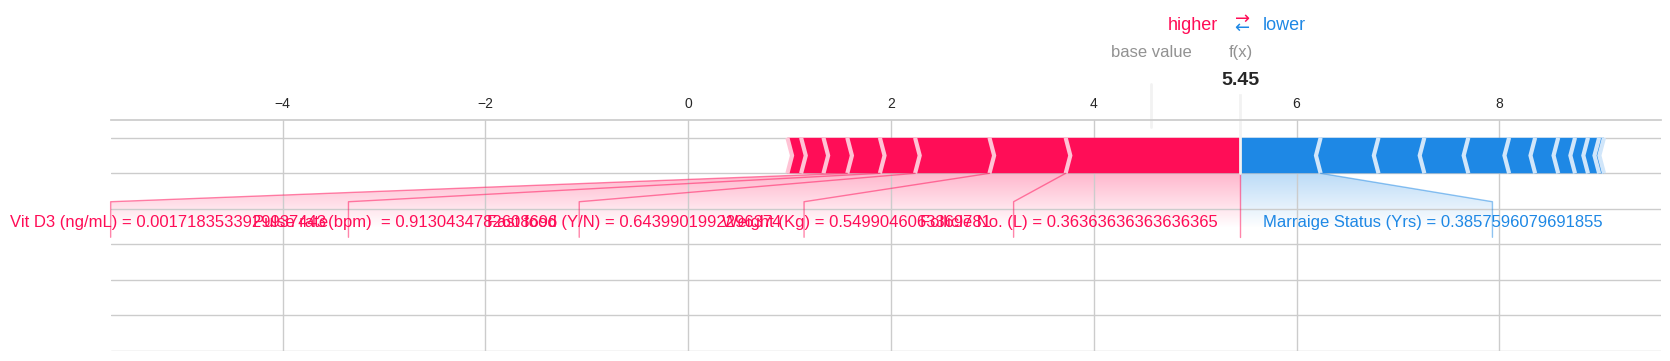

In [45]:
shap.initjs()
choosen_instance = X_test.loc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value,
                shap_values[0],
                choosen_instance,
                matplotlib=True)

In [42]:
from flask import Flask, request, jsonify
app = Flask(__name__)
# Define a global variable to store the prediction
global_prediction = None
@app.route('/predict1', methods=['POST'])
def predict1():
    global global_prediction  # Declare that you are using the global variable
    data = request.get_json()
    # Extract input data from the request
    input_data = data.get('input_data')
    #global_prediction = ensemble1.predict(X_test.values[0].reshape(1, -1))
    global_prediction = ensemble1.predict(input_data.reshape(1, -1))
    print('global')
    print(global_prediction)
    # Return the prediction as JSON
    return jsonify({'prediction': int(global_prediction[0])})
    #return jsonify({'prediction': int(yhat[0])})
if __name__ == '__main__':
    app.run(port=5000)
# Now you can print the value of global_prediction outside of the Flask app
print(global_prediction)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


None
